## Problem 3.3

$r > R$ でのポテンシャルは
$$
\Phi(r,\theta,\phi) = \frac{2V}{\pi} \sum_{l=0}^\infty \frac{(-1)^l}{2l+1}\left(\frac{R}{r}\right)^{2l+1}P_{2l}(\cos\theta)
$$
であり，$r < R$ でのポテンシャルは
$$
\Phi(r,\theta,\phi) = 
V \mp \frac{2V}{\pi} \sum_{l=0}^\infty \frac{(-1)^l}{2l+1} \left(\frac{r}{R}\right)^{2l+1} P_{2l+1}(\cos\theta) \quad (z \gtrless 0)
$$
である．

In [1]:
##--- common ---##
import numpy as np
import matplotlib.pyplot as plt
import scipy.special as sp
from scipy.integrate import quad

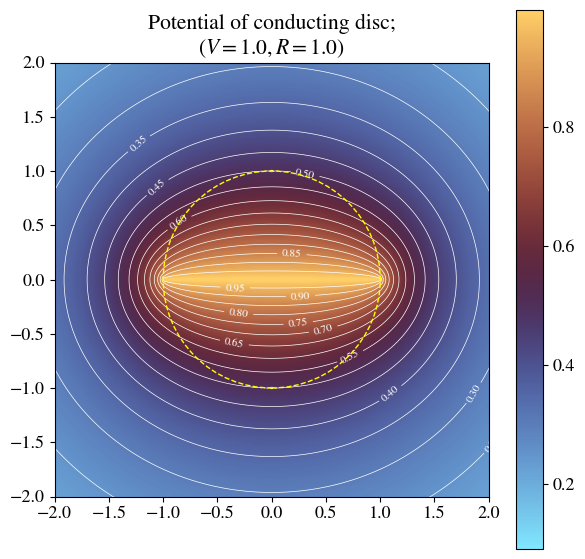

In [24]:
fig = plt.figure(figsize=(7,7))
plt.rcParams['font.size']=13
plt.rcParams['font.family']='STIXGeneral'
plt.rcParams['mathtext.fontset']='stix'

#--- initial condition(s) ---#
NN = 100# grid number per 1 unit length
rd = 1.0# radius of disk(= R)
lmax = 40# number of terms
vv = 1.0# potential on the disk(r≤R)

#--- READY ---#
xx = np.linspace(-5*rd,5*rd,NN*10)
zz = np.linspace(-5*rd,5*rd,NN*10)
xx,zz=np.meshgrid(xx,zz)


#--- convert to polar coordinate ---#
rr = np.sqrt(xx**2+zz**2)
##xx = rr*sin(th), zz = rr*cos(th)
##→th = atan(xx/zz)
th = np.arctan2(xx,zz)
th = (th + 2*np.pi)%(2*np.pi)# convert to [0,2π] from [-π,π]
cos_th = np.cos(th)

#--- calculation ---#


phi_in = np.full_like(xx,vv)
phi_out = np.full_like(xx,0)

for l in range(0,lmax+1):
    P_2l = sp.legendre(2*l)
    P_2lp1 = sp.legendre(2*l+1)

    CC = 2 * vv / np.pi * (-1)**l/(2*l+1)
    

    #term_in = CC * rr**l / rd**(l+1) * P_l(cos_th)
    term_out = CC * (rd/rr)**(2*l+1) * P_2l(cos_th)
    term_in = - CC * (rr/rd)**(2*l+1) * P_2lp1(np.sign(cos_th)*cos_th)
    phi_in += term_in
    phi_out += term_out



phi = np.where(rr <= rd, phi_in, phi_out)


#--- drawing ---#
ax=fig.add_subplot(111)
ax.set_aspect('equal')
ax.set_xlim(-2,2)
ax.set_ylim(-2,2)
tle = "Potential of conducting disc;\n" + r"($V = 1.0, R = 1.0$)"
ax.set_title(tle)

sphere = plt.Circle((0, 0), rd, fill=False, edgecolor='yellow', zorder=10, linestyle='--')
ax.add_artist(sphere)


mesh=ax.pcolormesh(xx,zz,phi,cmap='managua_r')
plt.colorbar(mesh)
cnt = ax.contour(xx,zz,phi,colors='white',linewidths=0.5,levels=np.linspace(0,1.0,21))
ax.clabel(cnt,inline=1,fontsize=8,fmt='%.2f')

plt.savefig('3-3_normal_w_circle.png',dpi=300,bbox_inches='tight')
plt.show()